# Takens's Embedding Theorem
### (an attempt)

Consider some dynamical system containing a $D$-dimensional attractor $\mathbf{A}$. Let $x(t)$ be an observed time-series that is a path within the attractor. Without knowing anything else about the dynamical system, we can embed $x(t)$ into a $d$-dimensional phase space via time-delay embedding:

$$\mathbf{X}(t) = [x(t),\ x(t+\tau),\ x(t+2\cdot\tau),\ ...,\ x(t+(d-1)\cdot\tau)]$$

where $\tau$ is some nonzero embedding delay.

### Takens's Embedding Theorem

$\mathbf{X}(t)$ is topologically equivalent to $\mathbf{A}$ if the embedding dimension is sufficiently high: $d > 2D$.

More generally, for any path taken through a dynamical system with $n$ degrees of freedom, a topologically equivalent structure can be reconstructed from its one-dimensional time series representation using a time-delay embedding procedure with embedding dimension $d > 2n$.

### The Gravitational Wave Dynamical System

The two gravitational wave polarizations are the dynamical degrees of freedom of the gravitational field. Apparent additional degrees of freedom in Einstein's equations are fixed by the initial data (aka solving the constraints) and imposing a coordinate system. So we want $d > 2\cdot 2 = 4$ (?)

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from tqdm.notebook import tqdm

from ts_outlier_detection import *
from ts_outlier_detection.plotting import *

# TOF

In [2]:
## Varying bump width

DATA_LENGTH = 1000
CTOF = TemporalOutlierFactor(dims=2, n_neighbors=10, event_length=200)
PLOTS = []

fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('TOF')
rect2.set_xlabel('Index')

def animate(frame):
    global PLOTS
    fig.suptitle(f'Bump width {frame}/{DATA_LENGTH}')
    data = np.zeros(DATA_LENGTH)
    middle = np.ceil(DATA_LENGTH/2) - 1
    data[int(middle - frame/2) : int(middle + frame/2)] = 1
    rect1.set_ylabel('Time Series')
    CTOF.fit(data)
    data_y, data_x = CTOF.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = plot_ts_outliers(CTOF, [rect1, rect2])
    return PLOTS

n_range = range(301)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=200, blit=True)
plt.close()
HTML(anim.to_html5_video())

  0%|          | 0/301 [00:00<?, ?it/s]

In [3]:
## Varying n_neighbors

DATA_LENGTH = 1000
frame = (1/50)*DATA_LENGTH
DATA = np.zeros(DATA_LENGTH)
middle = np.ceil(DATA_LENGTH/2) - 1
DATA[int(middle - frame/2) : int(middle + frame/2)] = 1
PLOTS = []

fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('TOF')
rect2.set_xlabel('Index')

def animate(frame):
    global PLOTS
    fig.suptitle(f'k = {frame}')
    rect1.set_ylabel(f'Time Series')
    ctof = TemporalOutlierFactor(dims=2, n_neighbors=frame, event_length=200)
    ctof.fit(DATA)
    data_y, data_x = ctof.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = plot_ts_outliers(ctof, [rect1, rect2])
    return PLOTS

n_range = range(3, 51)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=500, blit=True)
plt.close()
HTML(anim.to_html5_video())

  0%|          | 0/48 [00:00<?, ?it/s]

In [4]:
## Varying delay

DATA_LENGTH = 1000
frame = (1/20)*DATA_LENGTH
DATA = np.zeros(DATA_LENGTH)
middle = np.ceil(DATA_LENGTH/2) - 1
DATA[int(middle - frame/2) : int(middle + frame/2)] = 1
PLOTS = []

fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('TOF')
rect2.set_xlabel('Index')

def animate(frame):
    global PLOTS
    fig.suptitle(f'tau = {frame}')
    rect1.set_ylabel(f'Time Series')
    ctof = TemporalOutlierFactor(dims=2, delay=frame, n_neighbors=10, event_length=200)
    ctof.fit(DATA)
    data_y, data_x = ctof.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = plot_ts_outliers(ctof, [rect1, rect2])
    return PLOTS

n_range = range(1, 101)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=100, blit=True)
plt.close()
HTML(anim.to_html5_video())

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
## Varying window offset

DATA_LENGTH = 1000
frame = (1/4)*DATA_LENGTH
DATA = np.zeros(DATA_LENGTH)
middle = np.ceil(DATA_LENGTH/2) - 1
DATA[int(middle - frame/2) : int(middle + frame/2)] = 1
PLOTS = []
FRAMES = 10

fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('TOF')
rect2.set_xlabel('Index')

def animate(frame):
    global PLOTS
    fig.suptitle(f'Offset = {frame/FRAMES}')
    rect1.set_ylabel(f'Time Series')
    ctof = TemporalOutlierFactor(dims=2, offset=frame/FRAMES, n_neighbors=10, event_length=200)
    ctof.fit(DATA)
    data_y, data_x = ctof.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = plot_ts_outliers(ctof, [rect1, rect2])
    return PLOTS

n_range = range(FRAMES)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=500, blit=True)
plt.close()
HTML(anim.to_html5_video())

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
## Varying embedding dimension

DATA_LENGTH = 1000
frame = (1/20)*DATA_LENGTH
DATA = np.zeros(DATA_LENGTH)
middle = np.ceil(DATA_LENGTH/2) - 1
DATA[int(middle - frame/2) : int(middle + frame/2)] = 1
PLOTS = []

fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('TOF')
rect2.set_xlabel('Index')

def animate(frame):
    global PLOTS
    fig.suptitle(f'Embedding Dimension = {frame}')
    rect1.set_ylabel(f'Time Series')
    ctof = TemporalOutlierFactor(dims=frame, n_neighbors=10, event_length=200)
    ctof.fit(DATA)
    data_y, data_x = ctof.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = plot_ts_outliers(ctof, [rect1, rect2])
    return PLOTS

n_range = range(2, 21)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=500, blit=True)
plt.close()
HTML(anim.to_html5_video())

  0%|          | 0/19 [00:00<?, ?it/s]

In [7]:
## Varying q

DATA_LENGTH = 1000
frame = (1/20)*DATA_LENGTH
DATA = np.zeros(DATA_LENGTH)
middle = np.ceil(DATA_LENGTH/2) - 1
DATA[int(middle - frame/2) : int(middle + frame/2)] = 1
PLOTS = []

fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('TOF')
rect2.set_xlabel('Index')

def animate(frame):
    global PLOTS
    fig.suptitle('q = %.2f' % frame)
    rect1.set_ylabel(f'Time Series')
    ctof = TemporalOutlierFactor(q=frame, n_neighbors=10, event_length=200)
    ctof.fit(DATA)
    data_y, data_x = ctof.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = plot_ts_outliers(ctof, [rect1, rect2])
    return PLOTS

n_range = np.arange(1, 6, 0.01)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=20, blit=True)
plt.close()
HTML(anim.to_html5_video())

  0%|          | 0/500 [00:00<?, ?it/s]

# LOF

  0%|          | 0/301 [00:00<?, ?it/s]

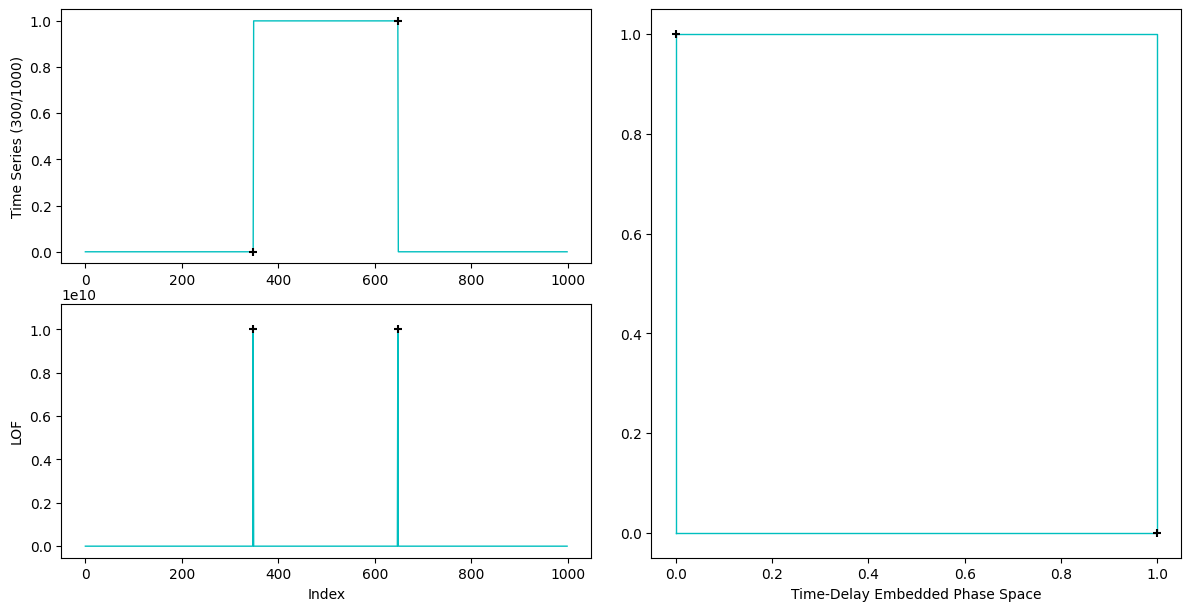

In [8]:
DATA_LENGTH = 1000
CLF = WindowedLocalOutlierFactor(dims=2, n_neighbors=10, crit_sigma=3)
PLOTS = []

fig = plt.figure(figsize=(12,6), constrained_layout=True)
gs = fig.add_gridspec(2, 4)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('LOF')
rect2.set_xlabel('Index')
square = fig.add_subplot(gs[:, 2:])
square.set_xlabel('Time-Delay Embedded Phase Space')

def animate(frame):
    global PLOTS
    data = np.zeros(DATA_LENGTH)
    middle = np.ceil(DATA_LENGTH/2) - 1
    bump = range(int(middle - frame/2), int(middle + frame/2))
    for i in bump: data[i] = 1
    rect1.set_ylabel(f'Time Series ({frame}/{DATA_LENGTH})')
    CLF.fit(data)
    data_y, data_x = CLF.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = [
        *plot_ts_outliers(CLF, [rect1, rect2]),
        *plot_2d_phase_space(CLF.get_embedded_data(), square, outlier_ids=CLF.get_outlier_indices())
    ]
    return PLOTS

n_range = range(301)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=200, blit=True)
HTML(anim.to_html5_video())